# Static Analysis
 
**Data Description**

1. Since I cannot receive real malware, I use the pefile analysis result saved in a dictionary (by calling **`pefile_dump()`** ) .
2. This dataset is composed of 40 malware samples, which are actually from 4 families. However, there is no class label of each item, so I can not perform classification and clustering might be a feasible solution.

>Therefore, in this project I try to cluster these 40 malwares into 4 groups.
<br>


***What I did in this project...***
<br>
In this project, I extract some useful information from PE file by writing parsers. 
Next, I do data preprocessing by one hot encoding, label encoding to make data more useful, and do PCA to reduce dimension. 
At last, I cluster malwares by using k-means to cluster 4 malware families.

### Download data


In [ ]:
# Here is the dump dictionary.
!wget https://drive.google.com/uc?id=1BTr1IDPhRF9WnFjXFwJWiqJ31qa-EWL9 -O pef_dumpdict_40.pickle

In [ ]:
# The size should be 414677 bytes.
!ls -al

total 424
drwxr-xr-x 1 root root   4096 Apr 23 17:31 .
drwxr-xr-x 1 root root   4096 Apr 23 17:23 ..
drwxr-xr-x 4 root root   4096 Apr 21 13:38 .config
-rw-r--r-- 1 root root 414677 Apr 23 17:31 pef_dumpdict_40.pickle
drwxr-xr-x 1 root root   4096 Apr 21 13:39 sample_data


In [ ]:
# It is stored in a pickle file.
# You can retrive it by using the following code.

import pickle
import os 

with open("/content/pef_dumpdict_40.pickle", 'rb') as fd:
  pef_dumpdicts = pickle.load(fd)

### Analyze the downloaded data

In [ ]:
# Now pef_dumpdict is what we want you to analyze.
# It combines 40 malware's pefile.dump_dict().

print(len(pef_dumpdicts))

40


In [ ]:
# The id of the 40 malwares are
for key in pef_dumpdicts.keys():
  print(key)

07edeebc14b053fffdfb4dcc08959360
0cfab9961285ab6e04f449c6d09cec37
2c1e90810ca30865cbf4440118c4aa0f
412c8d4d6afc88391e6dad508106681a
656f628856a62f1dc14748bff4cee2e5
8595c554539a172534c95222260650e5
88b666fd4ef1c21f4051ad3f859ee5bd
8aa66c2a430c3545c542e8419de13385
e776d8d8d187bdb68f41dc9ccfc86444
ed1304342c5794cb0a55840253793b45
2650e58a609438ba18706f539b49a6af
2a5932a800123709eff21dbd2310e090
4271ba51876b1e931dd55b2ccff25789
52cae62ada8b02adae128e35686cbc16
774b71a232568ca7ea09c0a26b82f8e5
7b57508defc0934c69b98544b4bac185
8081b6b58cc3372ad62a5d8b6ce09c0b
8e6d8d46e4a7482b9475e6c5b211dc61
b4e89348aa9b635b8edce746f8231303
e0ad769d1bd2b9b6444796f99b52a43f
0c6e68a34804df907df26d7139b1f052
0e751a5b6db31895c283ddd9757477de
0f74a58af435599ec94eff2b72d5e55e
1d0ce31c6d7129a74e2921e8d161c752
2cceeae738cae520544e9d9fda9ca30e
2ea5285f04bc9a0b3008165779a382ec
2f45c7132f623cd7caea6d7965d53a0f
3b569cd1c63b83446420dd798a8622b7
3f07e530430d1d450bfeaf0a595109b1
4aa9b2104ac7c7602c4258a0f7ce2b44
17af47cdfd

In [ ]:
# so the fist dump_dict is
first_dict = pef_dumpdicts['07edeebc14b053fffdfb4dcc08959360']

# you can now access the data you want
# for example print all sections and their info.
for sec in first_dict['PE Sections']:
  print(sec)

# or like this (as what we see in pefile demonstration)
print("\nName, Misc_VirtualSize, SizeOfRawData, Entropy, MD5")
for sec in first_dict['PE Sections']:
  print(sec['Name']['Value'], sec['Misc_VirtualSize']['Value'], sec['SizeOfRawData']['Value'], sec['Entropy'], sec['MD5'])

{'Structure': 'IMAGE_SECTION_HEADER', 'Name': {'FileOffset': 464, 'Offset': 0, 'Value': 'UPX0\\x00\\x00\\x00\\x00'}, 'Misc': {'FileOffset': 472, 'Offset': 8, 'Value': 20480}, 'Misc_PhysicalAddress': {'FileOffset': 472, 'Offset': 8, 'Value': 20480}, 'Misc_VirtualSize': {'FileOffset': 472, 'Offset': 8, 'Value': 20480}, 'VirtualAddress': {'FileOffset': 476, 'Offset': 12, 'Value': 4096}, 'SizeOfRawData': {'FileOffset': 480, 'Offset': 16, 'Value': 0}, 'PointerToRawData': {'FileOffset': 484, 'Offset': 20, 'Value': 1024}, 'PointerToRelocations': {'FileOffset': 488, 'Offset': 24, 'Value': 0}, 'PointerToLinenumbers': {'FileOffset': 492, 'Offset': 28, 'Value': 0}, 'NumberOfRelocations': {'FileOffset': 496, 'Offset': 32, 'Value': 0}, 'NumberOfLinenumbers': {'FileOffset': 498, 'Offset': 34, 'Value': 0}, 'Characteristics': {'FileOffset': 500, 'Offset': 36, 'Value': 3758096512}, 'Flags': ['IMAGE_SCN_CNT_UNINITIALIZED_DATA', 'IMAGE_SCN_MEM_EXECUTE', 'IMAGE_SCN_MEM_READ', 'IMAGE_SCN_MEM_WRITE'], 'Entr

# Your solution
1. I use these information as features to cluster.

Information | accuracy | 
----------|:-----:|
FILE_HEADER | TimeDateStamp |
FILE_HEADER |  NumberOfSections |
PE Sections | MD5 |
PE Sections         | Flags |
PE Sections         | SizeOfRawData |
PE Sections         | Misc |
PE Sections         | Name |
OPTIONAL_HEADER | CheckSum |

2. Before clustering, I preprocess the data by **one hot encoding** and **label encoding**, and reduce dimension by **PCA**.
4. I use **k-means** to cluster samples into 4 groups. 

## Extract some information

In [ ]:
for key in first_dict.keys():
  print(key)

Parsing Warnings
DOS_HEADER
NT_HEADERS
FILE_HEADER
Flags
OPTIONAL_HEADER
DllCharacteristics
PE Sections
Directories
Imported symbols


### FILE_HEADER / TimeDateStamp

In [ ]:
time_list = []

for key in pef_dumpdicts.keys():
  pef_dump_dict = pef_dumpdicts[key]
  time = pef_dump_dict['FILE_HEADER']['TimeDateStamp']['Value']
  record_list = []
  record_list.append(time) 
  time_list.append(record_list)

### FILE_HEADER / NumberOfSections

In [ ]:
sec_list = []

for key in pef_dumpdicts.keys():
  pef_dump_dict = pef_dumpdicts[key]
  sec = pef_dump_dict['FILE_HEADER']['NumberOfSections']['Value']
  record_list = []
  record_list.append(sec) 
  sec_list.append(record_list)

### PE Sections / MD5, SHA1, SHA256, SHA512

In [ ]:
md5_list = []

for key in pef_dumpdicts.keys():
  pef_dump_dict = pef_dumpdicts[key]
  record_list = []
  for records in pef_dump_dict['PE Sections']:
    MD5 = records['MD5']
    record_list.append(MD5) 
  md5_list.append(record_list)

### PE Sections / Flags

In [ ]:
flag_list = []

for key in pef_dumpdicts.keys():
  pef_dump_dict = pef_dumpdicts[key]
  record_list = []
  for records in pef_dump_dict['PE Sections']:
    for i in records['Flags']:
      record_list.append(i) 
  flag_list.append(record_list)

### PE Sections / SizeOfRawData

In [ ]:
rawdata_list = []

for key in pef_dumpdicts.keys():
  pef_dump_dict = pef_dumpdicts[key]
  record_list = []
  for records in pef_dump_dict['PE Sections']:
    raw_data = records['SizeOfRawData']['Value']
    if raw_data != 0 and raw_data != 7680:
      record_list.append(raw_data) 
  rawdata_list.append(record_list)

### PE Sections / Misc

In [ ]:
misc_list = []

for key in pef_dumpdicts.keys():
  pef_dump_dict = pef_dumpdicts[key]
  record_list = []
  for records in pef_dump_dict['PE Sections']:
    misc = records['Misc']['Value']
    record_list.append(misc)
    c =  record_list[2:]
  misc_list.append(c)

### PE Sections / Name

In [ ]:
name_list = []

for key in pef_dumpdicts.keys():
  pef_dump_dict = pef_dumpdicts[key]
  record_list = []
  for records in pef_dump_dict['PE Sections']:
    name = records['Name']['Value']
    if name != 'UPX0\\x00\\x00\\x00\\x00' and name != 'UPX1\\x00\\x00\\x00\\x00' and name != 'UPX2\\x00\\x00\\x00\\x00':
      record_list.append(name) 
  name_list.append(record_list)

### OPTIONAL_HEADER / CheckSum

In [ ]:
checksum_list = []

for key in pef_dumpdicts.keys():
  pef_dump_dict = pef_dumpdicts[key]
  record_list = []
  checksum = pef_dump_dict['OPTIONAL_HEADER']['CheckSum']['Value']
  record_list.append(checksum)
  checksum_list.append(record_list)



---



## Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np 

key_list = []

for key in pef_dumpdicts.keys():
  key_list.append(key)

### one hot encoding

In [ ]:
from nltk.util import ngrams
twogram_list = []

for li in md5_list:
  two_gram = list(ngrams(li, 2))
  twogram_list.append(two_gram)

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

misc_array = np.array(misc_list)
df_misc = pd.DataFrame(misc_array, columns=['md5'], index=key_list)

# one hot encoding
mlb = MultiLabelBinarizer(sparse_output=True)
df_misc = df_misc.join(
    pd.DataFrame.sparse.from_spmatrix(
        mlb.fit_transform(df_misc.pop('md5')),
        index=df_misc.index,
        columns=mlb.classes_))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
md5_array = np.array(twogram_list)
df_md5 = pd.DataFrame(md5_array, columns=['md5'], index=key_list) 

# one hot encoding
mlb = MultiLabelBinarizer(sparse_output=True)
df_md5 = df_md5.join(
    pd.DataFrame.sparse.from_spmatrix(
        mlb.fit_transform(df_md5.pop('md5')), 
        index=df_md5.index,
        columns=mlb.classes_))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [ ]:
rawdata_array = np.array(rawdata_list)
df_rawdata = pd.DataFrame(rawdata_array, columns=['raw data'], index=key_list)

# one hot encoding
mlb = MultiLabelBinarizer(sparse_output=True)
df_rawdata = df_rawdata.join(
    pd.DataFrame.sparse.from_spmatrix(
        mlb.fit_transform(df_rawdata.pop('raw data')),
        index=df_rawdata.index,
        columns=mlb.classes_))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [ ]:
name_array = np.array(name_list)
df_name = pd.DataFrame(name_array, columns=['name'], index=key_list)

# one hot encoding
mlb = MultiLabelBinarizer(sparse_output=True)
df_name = df_name.join(
    pd.DataFrame.sparse.from_spmatrix(
        mlb.fit_transform(df_name.pop('name')), 
        index=df_name.index,
        columns=mlb.classes_))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [ ]:
a = np.array(sec_list)
record_list = []

for sec in a:
  if sec == 3:
    record_list.append(0)
  elif sec == 4:
    record_list.append(1)

sec_array = np.array(record_list)

df_sec = pd.DataFrame(sec_array, columns=['sec_num'], index=key_list)

In [ ]:
a = np.array(checksum_list)
record_list = []

for checksum in a:
  if checksum == 195901:
    record_list.append(0)
  elif checksum == 0:
    record_list.append(1)

checksum_array = np.array(record_list)

df_checksum = pd.DataFrame(checksum_array, columns=['checksum'], index=key_list)

### label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
time_array = np.array(time_list)

df_time = pd.DataFrame(time_array, columns=['timestamp'], index=key_list)

# label encoding
labelencoder = LabelEncoder() 
df_time['timestamp'] = labelencoder.fit_transform(df_time['timestamp']) # replace the column with encoded data

In [ ]:
flag_1 = ['IMAGE_SCN_CNT_UNINITIALIZED_DATA',
          'IMAGE_SCN_MEM_EXECUTE',
          'IMAGE_SCN_MEM_READ',
          'IMAGE_SCN_MEM_WRITE',
          'IMAGE_SCN_CNT_CODE',
          'IMAGE_SCN_CNT_INITIALIZED_DATA',
          'IMAGE_SCN_MEM_EXECUTE',
          'IMAGE_SCN_MEM_READ',
          'IMAGE_SCN_MEM_WRITE',
          'IMAGE_SCN_CNT_CODE',
          'IMAGE_SCN_CNT_INITIALIZED_DATA',
          'IMAGE_SCN_MEM_EXECUTE',
          'IMAGE_SCN_MEM_READ',
          'IMAGE_SCN_MEM_WRITE']
          
flag_2 = ['IMAGE_SCN_CNT_UNINITIALIZED_DATA',
           'IMAGE_SCN_MEM_EXECUTE',
           'IMAGE_SCN_MEM_READ',
           'IMAGE_SCN_MEM_WRITE',
           'IMAGE_SCN_CNT_CODE',
           'IMAGE_SCN_CNT_INITIALIZED_DATA',
           'IMAGE_SCN_MEM_EXECUTE',
           'IMAGE_SCN_MEM_READ',
           'IMAGE_SCN_MEM_WRITE',
           'IMAGE_SCN_CNT_CODE',
           'IMAGE_SCN_CNT_INITIALIZED_DATA',
           'IMAGE_SCN_MEM_EXECUTE',
           'IMAGE_SCN_MEM_READ',
           'IMAGE_SCN_MEM_WRITE',
           'IMAGE_SCN_CNT_CODE',
           'IMAGE_SCN_MEM_EXECUTE',
           'IMAGE_SCN_MEM_READ',
           'IMAGE_SCN_MEM_WRITE']

flag_3 =['IMAGE_SCN_CNT_UNINITIALIZED_DATA',
          'IMAGE_SCN_MEM_EXECUTE',
          'IMAGE_SCN_MEM_READ',
          'IMAGE_SCN_MEM_WRITE',
          'IMAGE_SCN_CNT_CODE',
          'IMAGE_SCN_CNT_INITIALIZED_DATA',
          'IMAGE_SCN_MEM_EXECUTE',
          'IMAGE_SCN_MEM_READ',
          'IMAGE_SCN_MEM_WRITE',
          'IMAGE_SCN_CNT_CODE',
          'IMAGE_SCN_MEM_EXECUTE',
          'IMAGE_SCN_MEM_READ',
          'IMAGE_SCN_MEM_WRITE']

In [ ]:
a = np.array(flag_list)
record_list = []

for flag in a:
  if flag == flag_1:
    record_list.append(0)
  elif flag == flag_2:
    record_list.append(1)
  elif flag == flag_3:
    record_list.append(2)

flag_array = np.array(record_list)

df_flag = pd.DataFrame(flag_array, columns=['characteristics'], index=key_list)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


### PCA

In [ ]:
df = pd.concat([df_time, df_sec], axis=1)
df = pd.concat([df, df_md5], axis=1)
df = pd.concat([df, df_rawdata], axis=1)
df = pd.concat([df, df_name], axis=1)
df = pd.concat([df, df_checksum], axis=1)
df = pd.concat([df, df_flag], axis=1)
df = pd.concat([df, df_misc], axis=1) 
df.shape

(40, 72)

explained variance ratio: [0.30541573 0.20710407]


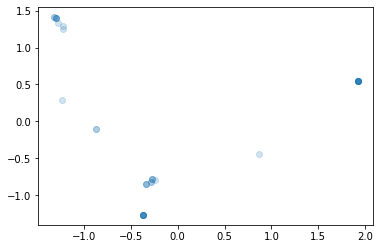

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X = np.array(df)

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

print('explained variance ratio: %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
plt.scatter(X_r[:, 0], X_r[:, 1], alpha=.2)
plt.show()

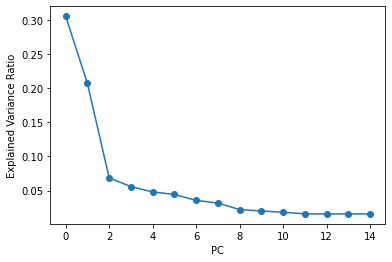

15 componets account for about 0.9216013751915402 in total variance.


In [ ]:
X = np.array(df)

pca = PCA(n_components=15)
X_r = pca.fit(X).transform(X)

def plotData(plt, data):
  x = [p[0] for p in data]
  y = [p[1] for p in data]
  plt.plot(x, y, '-o')

plotData(plt, list(zip(range(X.shape[1]), pca.explained_variance_ratio_)))
plt.xlabel("PC")
plt.ylabel("Explained Variance Ratio")
plt.show()
pca1_to_8 = np.sum(pca.explained_variance_ratio_[:15])

print('15 componets account for about ' + str(pca1_to_8) + ' in total variance.')

## Unsupervised Learning

### K-means

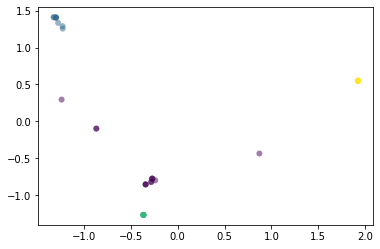

In [ ]:
from sklearn.cluster import KMeans
X = np.array(X_r)
Kmean = KMeans(n_clusters=4).fit(X)

plt.scatter(X[:, 0], X[:, 1],
            c=Kmean.labels_, edgecolor='none', alpha=0.5,)

## Result

In [ ]:
cluster = pd.DataFrame(Kmean.labels_, index=key_list, columns=['type'])
cluster

,type
07edeebc14b053fffdfb4dcc08959360,3
0cfab9961285ab6e04f449c6d09cec37,3
2c1e90810ca30865cbf4440118c4aa0f,3
412c8d4d6afc88391e6dad508106681a,3
656f628856a62f1dc14748bff4cee2e5,3
8595c554539a172534c95222260650e5,3
88b666fd4ef1c21f4051ad3f859ee5bd,3
8aa66c2a430c3545c542e8419de13385,3
e776d8d8d187bdb68f41dc9ccfc86444,3
ed1304342c5794cb0a55840253793b45,3
